In [1]:
import numpy as np

In [2]:
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")


### Shape of data

In [3]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))


Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


### Three layer CNN

In [4]:
import matplotlib.pyplot as plt
from train import Solver
from BasicCNN import *
from SqueezeNet import *

In [5]:
num_training = 2115
num_test = 443


means = np.mean(X_train_valid, axis=2, keepdims = True)
stds = np.std(X_train_valid, axis=2, keepdims = True)
X_train = (X_train_valid - means) / stds


means = np.mean(X_test, axis=2, keepdims = True)
stds = np.std(X_test, axis=2, keepdims = True)
X_val = (X_test - means) / stds

y_train = y_train_valid - 769
y_val = y_test - 769


data = {
  'X_train': torch.from_numpy(X_train),
  'y_train': torch.from_numpy(y_train),
  'X_val': torch.from_numpy(X_val),
  'y_val': torch.from_numpy(y_val),
}

# Basic CNN Train Data

In [6]:
solver = Solver(data, num_epochs=200, 
                learning_rate= 2e-4, 
                weight_decay = 5e-5, 
                batch_size = 32)

solver.train(model_type = BasicCNN, 
             func_type = nn.ELU, 
             pool_type = nn.AvgPool1d)

Epoch [1/200], Step [10/66], Loss: 1.3266
Epoch [1/200], Step [20/66], Loss: 1.1728
Epoch [1/200], Step [30/66], Loss: 1.4239
Epoch [1/200], Step [40/66], Loss: 1.5187
Epoch [1/200], Step [50/66], Loss: 1.7440
Epoch [1/200], Step [60/66], Loss: 1.4670
Epoch [1/200], Train Accuracy: 41.47%, Test Accuracy: 33.86%, Time: 4.175274654000001s
Epoch [2/200], Step [10/66], Loss: 1.4782
Epoch [2/200], Step [20/66], Loss: 1.3185
Epoch [2/200], Step [30/66], Loss: 1.4001
Epoch [2/200], Step [40/66], Loss: 1.3816
Epoch [2/200], Step [50/66], Loss: 1.5497
Epoch [2/200], Step [60/66], Loss: 1.1819
Epoch [2/200], Train Accuracy: 48.04%, Test Accuracy: 41.76%, Time: 4.2950097110000005s
Epoch [3/200], Step [10/66], Loss: 1.2775
Epoch [3/200], Step [20/66], Loss: 1.4376
Epoch [3/200], Step [30/66], Loss: 0.9686
Epoch [3/200], Step [40/66], Loss: 1.5437
Epoch [3/200], Step [50/66], Loss: 1.2795
Epoch [3/200], Step [60/66], Loss: 1.4159
Epoch [3/200], Train Accuracy: 53.10%, Test Accuracy: 47.86%, Time: 3

Epoch [25/200], Step [10/66], Loss: 0.7710
Epoch [25/200], Step [20/66], Loss: 0.9099
Epoch [25/200], Step [30/66], Loss: 0.8184
Epoch [25/200], Step [40/66], Loss: 0.6484
Epoch [25/200], Step [50/66], Loss: 1.0519
Epoch [25/200], Step [60/66], Loss: 0.8460
Epoch [25/200], Train Accuracy: 69.83%, Test Accuracy: 60.72%, Time: 5.140967761000013s
Epoch [26/200], Step [10/66], Loss: 1.0802
Epoch [26/200], Step [20/66], Loss: 1.0150
Epoch [26/200], Step [30/66], Loss: 1.0866
Epoch [26/200], Step [40/66], Loss: 0.8455
Epoch [26/200], Step [50/66], Loss: 1.1018
Epoch [26/200], Step [60/66], Loss: 0.8455
Epoch [26/200], Train Accuracy: 73.85%, Test Accuracy: 62.30%, Time: 5.208448156000003s
Epoch [27/200], Step [10/66], Loss: 1.0182
Epoch [27/200], Step [20/66], Loss: 0.5999
Epoch [27/200], Step [30/66], Loss: 0.7846
Epoch [27/200], Step [40/66], Loss: 0.7164
Epoch [27/200], Step [50/66], Loss: 0.8033
Epoch [27/200], Step [60/66], Loss: 0.7995
Epoch [27/200], Train Accuracy: 76.36%, Test Accur

Epoch [48/200], Train Accuracy: 83.74%, Test Accuracy: 67.27%, Time: 6.2515528670000435s
Epoch [49/200], Step [10/66], Loss: 0.4202
Epoch [49/200], Step [20/66], Loss: 0.5093
Epoch [49/200], Step [30/66], Loss: 0.7349
Epoch [49/200], Step [40/66], Loss: 0.5789
Epoch [49/200], Step [50/66], Loss: 0.7612
Epoch [49/200], Step [60/66], Loss: 0.6223
Epoch [49/200], Train Accuracy: 85.58%, Test Accuracy: 67.72%, Time: 4.626150300999996s
Epoch [50/200], Step [10/66], Loss: 0.6353
Epoch [50/200], Step [20/66], Loss: 0.7026
Epoch [50/200], Step [30/66], Loss: 0.5831
Epoch [50/200], Step [40/66], Loss: 0.6113
Epoch [50/200], Step [50/66], Loss: 0.5571
Epoch [50/200], Step [60/66], Loss: 0.4586
Epoch [50/200], Train Accuracy: 86.24%, Test Accuracy: 67.95%, Time: 4.721347745999992s
Epoch [51/200], Step [10/66], Loss: 0.7727
Epoch [51/200], Step [20/66], Loss: 0.6717
Epoch [51/200], Step [30/66], Loss: 0.4446
Epoch [51/200], Step [40/66], Loss: 0.7670
Epoch [51/200], Step [50/66], Loss: 0.6747
Epoc

Epoch [72/200], Step [50/66], Loss: 0.4263
Epoch [72/200], Step [60/66], Loss: 0.4730
Epoch [72/200], Train Accuracy: 91.30%, Test Accuracy: 70.43%, Time: 4.101332027000012s
Epoch [73/200], Step [10/66], Loss: 0.4898
Epoch [73/200], Step [20/66], Loss: 0.5325
Epoch [73/200], Step [30/66], Loss: 0.3182
Epoch [73/200], Step [40/66], Loss: 0.2830
Epoch [73/200], Step [50/66], Loss: 0.4538
Epoch [73/200], Step [60/66], Loss: 0.4590
Epoch [73/200], Train Accuracy: 88.27%, Test Accuracy: 69.75%, Time: 3.4936558569999647s
Epoch [74/200], Step [10/66], Loss: 0.4436
Epoch [74/200], Step [20/66], Loss: 0.5275
Epoch [74/200], Step [30/66], Loss: 0.6212
Epoch [74/200], Step [40/66], Loss: 0.3442
Epoch [74/200], Step [50/66], Loss: 0.2552
Epoch [74/200], Step [60/66], Loss: 0.3452
Epoch [74/200], Train Accuracy: 93.14%, Test Accuracy: 71.33%, Time: 4.050158762000024s
Epoch [75/200], Step [10/66], Loss: 0.3348
Epoch [75/200], Step [20/66], Loss: 0.5688
Epoch [75/200], Step [30/66], Loss: 0.4822
Epoc

Epoch [96/200], Step [30/66], Loss: 0.3924
Epoch [96/200], Step [40/66], Loss: 0.7585
Epoch [96/200], Step [50/66], Loss: 0.3785
Epoch [96/200], Step [60/66], Loss: 0.3416
Epoch [96/200], Train Accuracy: 96.31%, Test Accuracy: 72.46%, Time: 3.246110574999989s
Epoch [97/200], Step [10/66], Loss: 0.4789
Epoch [97/200], Step [20/66], Loss: 0.3732
Epoch [97/200], Step [30/66], Loss: 0.3024
Epoch [97/200], Step [40/66], Loss: 0.4740
Epoch [97/200], Step [50/66], Loss: 0.4559
Epoch [97/200], Step [60/66], Loss: 0.4950
Epoch [97/200], Train Accuracy: 95.22%, Test Accuracy: 72.23%, Time: 3.4174133420000317s
Epoch [98/200], Step [10/66], Loss: 0.6010
Epoch [98/200], Step [20/66], Loss: 0.3364
Epoch [98/200], Step [30/66], Loss: 0.5080
Epoch [98/200], Step [40/66], Loss: 0.5387
Epoch [98/200], Step [50/66], Loss: 0.2598
Epoch [98/200], Step [60/66], Loss: 0.2990
Epoch [98/200], Train Accuracy: 95.93%, Test Accuracy: 73.59%, Time: 3.115274834000047s
Epoch [99/200], Step [10/66], Loss: 0.3970
Epoc

Epoch [119/200], Step [60/66], Loss: 0.1958
Epoch [119/200], Train Accuracy: 97.78%, Test Accuracy: 71.78%, Time: 4.472690983999996s
Epoch [120/200], Step [10/66], Loss: 0.3690
Epoch [120/200], Step [20/66], Loss: 0.2878
Epoch [120/200], Step [30/66], Loss: 0.4014
Epoch [120/200], Step [40/66], Loss: 0.4137
Epoch [120/200], Step [50/66], Loss: 0.3894
Epoch [120/200], Step [60/66], Loss: 0.2982
Epoch [120/200], Train Accuracy: 98.06%, Test Accuracy: 72.91%, Time: 4.915218020999987s
Epoch [121/200], Step [10/66], Loss: 0.1994
Epoch [121/200], Step [20/66], Loss: 0.5584
Epoch [121/200], Step [30/66], Loss: 0.2509
Epoch [121/200], Step [40/66], Loss: 0.2547
Epoch [121/200], Step [50/66], Loss: 0.2636
Epoch [121/200], Step [60/66], Loss: 0.5127
Epoch [121/200], Train Accuracy: 96.69%, Test Accuracy: 72.23%, Time: 4.469577164999919s
Epoch [122/200], Step [10/66], Loss: 0.4059
Epoch [122/200], Step [20/66], Loss: 0.4748
Epoch [122/200], Step [30/66], Loss: 0.2247
Epoch [122/200], Step [40/66]

Epoch [143/200], Step [10/66], Loss: 0.2297
Epoch [143/200], Step [20/66], Loss: 0.3110
Epoch [143/200], Step [30/66], Loss: 0.1587
Epoch [143/200], Step [40/66], Loss: 0.2475
Epoch [143/200], Step [50/66], Loss: 0.1473
Epoch [143/200], Step [60/66], Loss: 0.2152
Epoch [143/200], Train Accuracy: 99.39%, Test Accuracy: 74.27%, Time: 4.053055943999993s
Epoch [144/200], Step [10/66], Loss: 0.4102
Epoch [144/200], Step [20/66], Loss: 0.3081
Epoch [144/200], Step [30/66], Loss: 0.2682
Epoch [144/200], Step [40/66], Loss: 0.3756
Epoch [144/200], Step [50/66], Loss: 0.3196
Epoch [144/200], Step [60/66], Loss: 0.2136
Epoch [144/200], Train Accuracy: 99.29%, Test Accuracy: 74.94%, Time: 3.7229581059999646s
Epoch [145/200], Step [10/66], Loss: 0.2761
Epoch [145/200], Step [20/66], Loss: 0.4247
Epoch [145/200], Step [30/66], Loss: 0.5195
Epoch [145/200], Step [40/66], Loss: 0.2224
Epoch [145/200], Step [50/66], Loss: 0.3271
Epoch [145/200], Step [60/66], Loss: 0.2517
Epoch [145/200], Train Accura

Epoch [166/200], Step [30/66], Loss: 0.2069
Epoch [166/200], Step [40/66], Loss: 0.1647
Epoch [166/200], Step [50/66], Loss: 0.4096
Epoch [166/200], Step [60/66], Loss: 0.0717
Epoch [166/200], Train Accuracy: 99.86%, Test Accuracy: 75.17%, Time: 3.5742898490000243s
Epoch [167/200], Step [10/66], Loss: 0.1791
Epoch [167/200], Step [20/66], Loss: 0.3764
Epoch [167/200], Step [30/66], Loss: 0.3716
Epoch [167/200], Step [40/66], Loss: 0.1710
Epoch [167/200], Step [50/66], Loss: 0.2469
Epoch [167/200], Step [60/66], Loss: 0.1804
Epoch [167/200], Train Accuracy: 99.24%, Test Accuracy: 73.14%, Time: 3.520545420000076s
Epoch [168/200], Step [10/66], Loss: 0.1454
Epoch [168/200], Step [20/66], Loss: 0.1610
Epoch [168/200], Step [30/66], Loss: 0.2223
Epoch [168/200], Step [40/66], Loss: 0.2054
Epoch [168/200], Step [50/66], Loss: 0.4887
Epoch [168/200], Step [60/66], Loss: 0.1740
Epoch [168/200], Train Accuracy: 99.91%, Test Accuracy: 75.40%, Time: 3.4731897160000926s
Epoch [169/200], Step [10/6

Epoch [189/200], Step [50/66], Loss: 0.2555
Epoch [189/200], Step [60/66], Loss: 0.3779
Epoch [189/200], Train Accuracy: 100.00%, Test Accuracy: 74.72%, Time: 3.363296468999806s
Epoch [190/200], Step [10/66], Loss: 0.1732
Epoch [190/200], Step [20/66], Loss: 0.1670
Epoch [190/200], Step [30/66], Loss: 0.1407
Epoch [190/200], Step [40/66], Loss: 0.1405
Epoch [190/200], Step [50/66], Loss: 0.0906
Epoch [190/200], Step [60/66], Loss: 0.1108
Epoch [190/200], Train Accuracy: 99.95%, Test Accuracy: 74.94%, Time: 4.0223625910000465s
Epoch [191/200], Step [10/66], Loss: 0.1878
Epoch [191/200], Step [20/66], Loss: 0.2859
Epoch [191/200], Step [30/66], Loss: 0.1547
Epoch [191/200], Step [40/66], Loss: 0.2211
Epoch [191/200], Step [50/66], Loss: 0.4146
Epoch [191/200], Step [60/66], Loss: 0.3951
Epoch [191/200], Train Accuracy: 100.00%, Test Accuracy: 75.62%, Time: 4.759471001000065s
Epoch [192/200], Step [10/66], Loss: 0.1349
Epoch [192/200], Step [20/66], Loss: 0.3062
Epoch [192/200], Step [30/

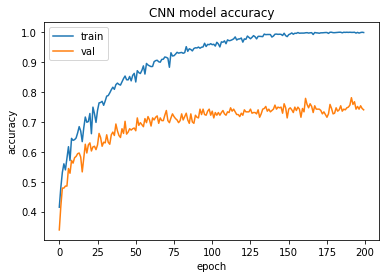

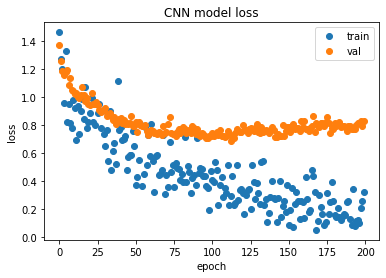

In [7]:
plt.plot(solver.train_acc_list, '-')
plt.plot(solver.val_acc_list, '-')
plt.title('CNN model accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


plt.plot(solver.loss_list, 'o')
plt.plot(solver.val_loss_list, 'o')
plt.title('CNN model loss')
plt.legend(['train', 'val'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [8]:
print(np.mean(solver.val_acc_list[-5:-1]))

0.7483069977426636


# SqueezeNet Train Data

In [16]:
solver = Solver(data, 
                num_epochs=500, 
                learning_rate= 2e-4, 
                weight_decay = 5e-7, 
                batch_size = 128)

solver.train(model_type = SqueezeNet, 
             func_type = nn.ELU, 
             pool_type = nn.AvgPool1d)

Epoch [1/500], Step [10/16], Loss: 1.6517
Epoch [1/500], Train Accuracy: 33.29%, Test Accuracy: 28.89%, Time: 3.699307572998805s
Epoch [2/500], Step [10/16], Loss: 1.5162
Epoch [2/500], Train Accuracy: 36.83%, Test Accuracy: 30.02%, Time: 3.452531512004498s
Epoch [3/500], Step [10/16], Loss: 1.5040
Epoch [3/500], Train Accuracy: 37.78%, Test Accuracy: 37.47%, Time: 3.3662082480004756s
Epoch [4/500], Step [10/16], Loss: 1.3358
Epoch [4/500], Train Accuracy: 39.67%, Test Accuracy: 38.60%, Time: 3.4188847719997284s
Epoch [5/500], Step [10/16], Loss: 1.3902
Epoch [5/500], Train Accuracy: 42.51%, Test Accuracy: 41.08%, Time: 3.2978489879969857s
Epoch [6/500], Step [10/16], Loss: 1.3951
Epoch [6/500], Train Accuracy: 42.88%, Test Accuracy: 42.66%, Time: 3.5861221520026447s
Epoch [7/500], Step [10/16], Loss: 1.3157
Epoch [7/500], Train Accuracy: 45.39%, Test Accuracy: 44.47%, Time: 4.638965737001854s
Epoch [8/500], Step [10/16], Loss: 1.2776
Epoch [8/500], Train Accuracy: 44.49%, Test Accurac

Epoch [64/500], Step [10/16], Loss: 0.8419
Epoch [64/500], Train Accuracy: 69.36%, Test Accuracy: 62.30%, Time: 3.6350858740042895s
Epoch [65/500], Step [10/16], Loss: 0.9758
Epoch [65/500], Train Accuracy: 68.46%, Test Accuracy: 63.66%, Time: 3.5669166480001877s
Epoch [66/500], Step [10/16], Loss: 0.9925
Epoch [66/500], Train Accuracy: 69.60%, Test Accuracy: 62.75%, Time: 3.5038476129993796s
Epoch [67/500], Step [10/16], Loss: 0.9801
Epoch [67/500], Train Accuracy: 69.69%, Test Accuracy: 64.33%, Time: 3.4962597800040385s
Epoch [68/500], Step [10/16], Loss: 0.7249
Epoch [68/500], Train Accuracy: 69.83%, Test Accuracy: 65.24%, Time: 3.5887837769987527s
Epoch [69/500], Step [10/16], Loss: 0.9048
Epoch [69/500], Train Accuracy: 70.45%, Test Accuracy: 62.30%, Time: 3.573813868999423s
Epoch [70/500], Step [10/16], Loss: 0.9404
Epoch [70/500], Train Accuracy: 69.50%, Test Accuracy: 63.21%, Time: 3.598662223004794s
Epoch [71/500], Step [10/16], Loss: 0.8111
Epoch [71/500], Train Accuracy: 70.

Epoch [126/500], Step [10/16], Loss: 0.8349
Epoch [126/500], Train Accuracy: 79.86%, Test Accuracy: 65.24%, Time: 2.788276384002529s
Epoch [127/500], Step [10/16], Loss: 0.8471
Epoch [127/500], Train Accuracy: 79.91%, Test Accuracy: 64.11%, Time: 2.9619592419985565s
Epoch [128/500], Step [10/16], Loss: 0.7784
Epoch [128/500], Train Accuracy: 80.19%, Test Accuracy: 65.69%, Time: 2.852146415003517s
Epoch [129/500], Step [10/16], Loss: 0.8735
Epoch [129/500], Train Accuracy: 79.05%, Test Accuracy: 65.46%, Time: 2.795814197001164s
Epoch [130/500], Step [10/16], Loss: 0.7319
Epoch [130/500], Train Accuracy: 79.62%, Test Accuracy: 63.43%, Time: 2.7648655919983867s
Epoch [131/500], Step [10/16], Loss: 0.6980
Epoch [131/500], Train Accuracy: 80.43%, Test Accuracy: 65.01%, Time: 2.8180039059952833s
Epoch [132/500], Step [10/16], Loss: 0.7229
Epoch [132/500], Train Accuracy: 80.61%, Test Accuracy: 66.14%, Time: 2.901183456997387s
Epoch [133/500], Step [10/16], Loss: 0.7996
Epoch [133/500], Train

Epoch [188/500], Step [10/16], Loss: 0.5632
Epoch [188/500], Train Accuracy: 85.86%, Test Accuracy: 66.59%, Time: 2.969499311999243s
Epoch [189/500], Step [10/16], Loss: 0.6479
Epoch [189/500], Train Accuracy: 85.63%, Test Accuracy: 67.27%, Time: 3.0003124799986836s
Epoch [190/500], Step [10/16], Loss: 0.7110
Epoch [190/500], Train Accuracy: 85.63%, Test Accuracy: 66.59%, Time: 2.8958336229989072s
Epoch [191/500], Step [10/16], Loss: 0.7166
Epoch [191/500], Train Accuracy: 86.34%, Test Accuracy: 66.59%, Time: 2.9233024129935075s
Epoch [192/500], Step [10/16], Loss: 0.6847
Epoch [192/500], Train Accuracy: 87.71%, Test Accuracy: 68.17%, Time: 2.900814039996476s
Epoch [193/500], Step [10/16], Loss: 0.7118
Epoch [193/500], Train Accuracy: 86.90%, Test Accuracy: 67.72%, Time: 2.896244930001558s
Epoch [194/500], Step [10/16], Loss: 0.7376
Epoch [194/500], Train Accuracy: 87.47%, Test Accuracy: 67.27%, Time: 2.8799883410028997s
Epoch [195/500], Step [10/16], Loss: 0.6182
Epoch [195/500], Trai

Epoch [250/500], Step [10/16], Loss: 0.4992
Epoch [250/500], Train Accuracy: 91.11%, Test Accuracy: 67.04%, Time: 3.094054414999846s
Epoch [251/500], Step [10/16], Loss: 0.5739
Epoch [251/500], Train Accuracy: 89.88%, Test Accuracy: 66.37%, Time: 3.127547604999563s
Epoch [252/500], Step [10/16], Loss: 0.5436
Epoch [252/500], Train Accuracy: 91.82%, Test Accuracy: 67.95%, Time: 3.2791789019975113s
Epoch [253/500], Step [10/16], Loss: 0.5648
Epoch [253/500], Train Accuracy: 91.54%, Test Accuracy: 67.04%, Time: 3.122198805998778s
Epoch [254/500], Step [10/16], Loss: 0.6548
Epoch [254/500], Train Accuracy: 91.63%, Test Accuracy: 66.82%, Time: 3.0814351419976447s
Epoch [255/500], Step [10/16], Loss: 0.5132
Epoch [255/500], Train Accuracy: 91.68%, Test Accuracy: 68.40%, Time: 2.8795536199977505s
Epoch [256/500], Step [10/16], Loss: 0.6456
Epoch [256/500], Train Accuracy: 90.07%, Test Accuracy: 66.59%, Time: 2.78333792599733s
Epoch [257/500], Step [10/16], Loss: 0.5727
Epoch [257/500], Train 

Epoch [312/500], Step [10/16], Loss: 0.4378
Epoch [312/500], Train Accuracy: 94.89%, Test Accuracy: 68.17%, Time: 2.2865756929968484s
Epoch [313/500], Step [10/16], Loss: 0.5246
Epoch [313/500], Train Accuracy: 95.13%, Test Accuracy: 68.40%, Time: 2.270600371004548s
Epoch [314/500], Step [10/16], Loss: 0.5094
Epoch [314/500], Train Accuracy: 95.74%, Test Accuracy: 67.95%, Time: 2.2818605249995016s
Epoch [315/500], Step [10/16], Loss: 0.6712
Epoch [315/500], Train Accuracy: 95.65%, Test Accuracy: 68.17%, Time: 2.282740429000114s
Epoch [316/500], Step [10/16], Loss: 0.5109
Epoch [316/500], Train Accuracy: 96.03%, Test Accuracy: 67.27%, Time: 2.2578332369957934s
Epoch [317/500], Step [10/16], Loss: 0.6487
Epoch [317/500], Train Accuracy: 96.08%, Test Accuracy: 65.01%, Time: 2.31881652600714s
Epoch [318/500], Step [10/16], Loss: 0.4986
Epoch [318/500], Train Accuracy: 95.98%, Test Accuracy: 66.37%, Time: 2.241256848006742s
Epoch [319/500], Step [10/16], Loss: 0.5078
Epoch [319/500], Train 

Epoch [374/500], Step [10/16], Loss: 0.4344
Epoch [374/500], Train Accuracy: 98.06%, Test Accuracy: 67.04%, Time: 2.5700456159975147s
Epoch [375/500], Step [10/16], Loss: 0.4572
Epoch [375/500], Train Accuracy: 97.78%, Test Accuracy: 68.17%, Time: 2.5305328570029815s
Epoch [376/500], Step [10/16], Loss: 0.4035
Epoch [376/500], Train Accuracy: 98.06%, Test Accuracy: 68.62%, Time: 2.4457618899978115s
Epoch [377/500], Step [10/16], Loss: 0.2902
Epoch [377/500], Train Accuracy: 98.16%, Test Accuracy: 66.14%, Time: 2.443759907997446s
Epoch [378/500], Step [10/16], Loss: 0.4809
Epoch [378/500], Train Accuracy: 98.20%, Test Accuracy: 66.59%, Time: 2.439348077001341s
Epoch [379/500], Step [10/16], Loss: 0.4021
Epoch [379/500], Train Accuracy: 98.11%, Test Accuracy: 67.49%, Time: 2.5048067060051835s
Epoch [380/500], Step [10/16], Loss: 0.4436
Epoch [380/500], Train Accuracy: 97.97%, Test Accuracy: 67.27%, Time: 2.442447669003741s
Epoch [381/500], Step [10/16], Loss: 0.5296
Epoch [381/500], Trai

Epoch [436/500], Step [10/16], Loss: 0.4013
Epoch [436/500], Train Accuracy: 99.01%, Test Accuracy: 67.72%, Time: 2.481177410998498s
Epoch [437/500], Step [10/16], Loss: 0.3619
Epoch [437/500], Train Accuracy: 99.10%, Test Accuracy: 66.82%, Time: 2.4471897289986373s
Epoch [438/500], Step [10/16], Loss: 0.4693
Epoch [438/500], Train Accuracy: 98.96%, Test Accuracy: 68.40%, Time: 2.469092665996868s
Epoch [439/500], Step [10/16], Loss: 0.3251
Epoch [439/500], Train Accuracy: 99.34%, Test Accuracy: 68.62%, Time: 2.449721718003275s
Epoch [440/500], Step [10/16], Loss: 0.3987
Epoch [440/500], Train Accuracy: 99.34%, Test Accuracy: 67.49%, Time: 2.449623361004342s
Epoch [441/500], Step [10/16], Loss: 0.4500
Epoch [441/500], Train Accuracy: 99.39%, Test Accuracy: 67.72%, Time: 2.8165341290005017s
Epoch [442/500], Step [10/16], Loss: 0.3980
Epoch [442/500], Train Accuracy: 99.43%, Test Accuracy: 67.04%, Time: 2.47055895000085s
Epoch [443/500], Step [10/16], Loss: 0.4571
Epoch [443/500], Train A

Epoch [498/500], Step [10/16], Loss: 0.4205
Epoch [498/500], Train Accuracy: 99.86%, Test Accuracy: 68.17%, Time: 2.444375102997583s
Epoch [499/500], Step [10/16], Loss: 0.3625
Epoch [499/500], Train Accuracy: 99.62%, Test Accuracy: 67.04%, Time: 2.4643060570015223s
Epoch [500/500], Step [10/16], Loss: 0.3211
Epoch [500/500], Train Accuracy: 99.81%, Test Accuracy: 67.72%, Time: 2.4681153320052545s


# Plot accuracy history

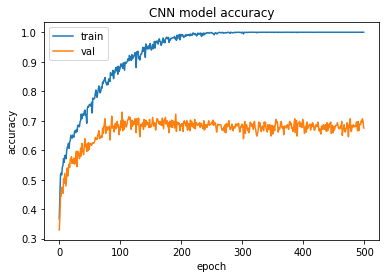

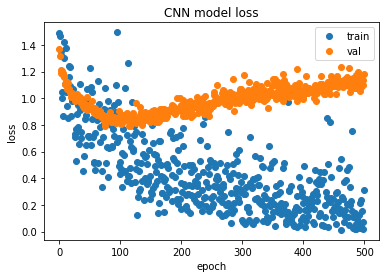

In [14]:
plt.plot(solver.train_acc_list, '-')
plt.plot(solver.val_acc_list, '-')
plt.title('CNN model accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


plt.plot(solver.loss_list, 'o')
plt.plot(solver.val_loss_list, 'o')
plt.title('CNN model loss')
plt.legend(['train', 'val'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [11]:
print(np.mean(solver.val_acc_list[-5:-1]))

0.6811512415349887
